In [1]:
import numpy as np
import pandas as pd
from IPython.display import YouTubeVideo, display
from skimage import io
from urllib.error import HTTPError
import matplotlib.pyplot as plt
import json

## Parte 2 

In [2]:
dfv=pd.read_csv('data/USvideos.csv')
dfv.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


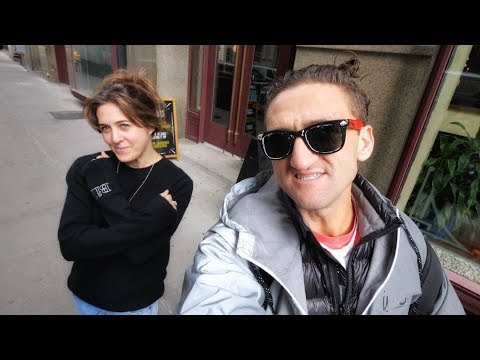

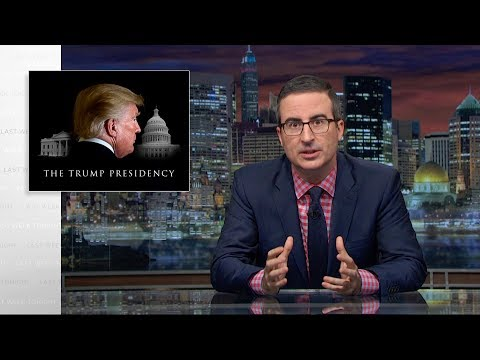

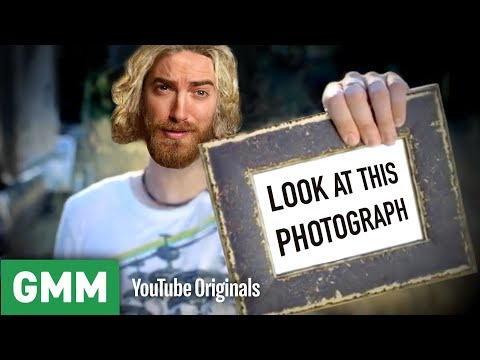

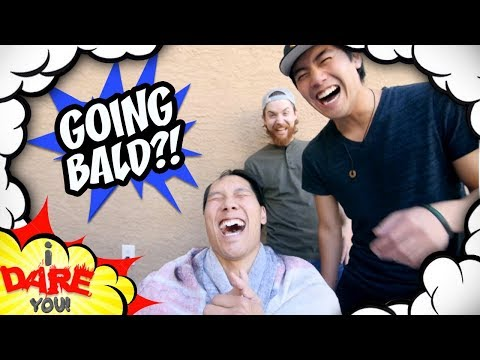

In [3]:
df5v=dfv[0:5]
videos=df5v['video_id']
for vid in videos:
#     print(vid)
    v=YouTubeVideo(vid, width=426, height=240)
    display(v)

## Parte 3 

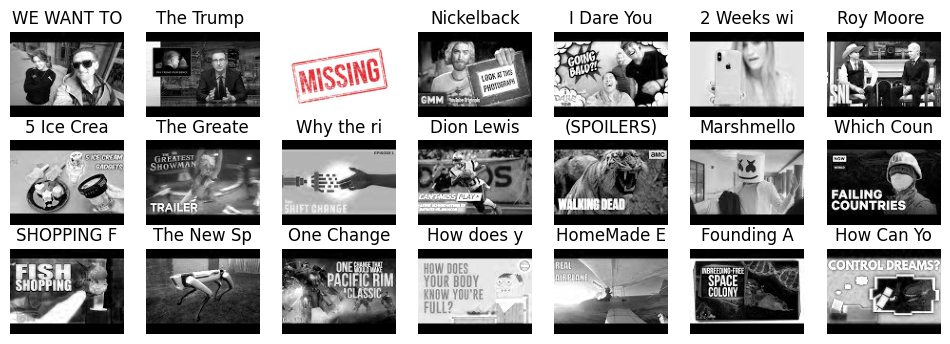

In [4]:
df21i=dfv[0:21]
imagenes=list(df21i['thumbnail_link'])
fig,axs=plt.subplots(3,7,figsize=(12,4))
titulos=list(df21i['title'])

for ax,url,title in zip(axs.flatten(),imagenes,titulos):
    try:
        ax.imshow(io.imread(url)[:,:,0],cmap='gray')
        ax.set_title(title[:10])
        ax.axis('off')
    except:
        ax.imshow(io.imread('http://www.dagdrivarn.se/BILDER/stambilder/MISSING.jpg'))
        ax.axis('off')
                      

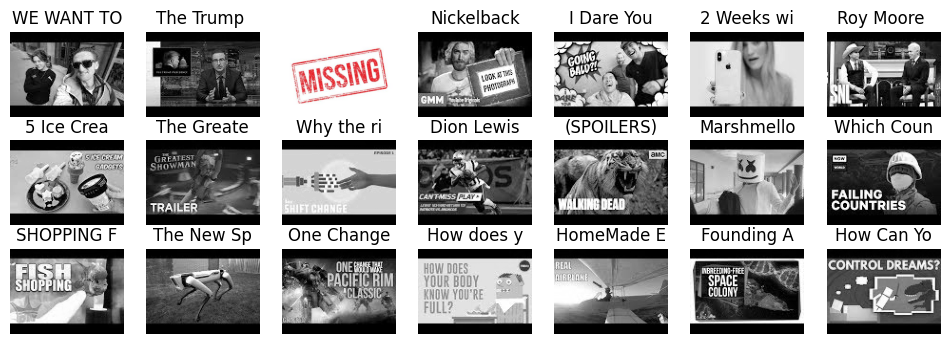

In [5]:
df21i=dfv[0:21]
imagenes=list(df21i['thumbnail_link'])
fig,axs=plt.subplots(3,7,figsize=(12,4))
titulos=list(df21i['title'])

for ax,url,title in zip(axs.flatten(),imagenes,titulos):
    try:
        ax.imshow(io.imread(url,as_gray=True),cmap='gray')
        ax.set_title(title[:10])
        ax.axis('off')
    except:
        ax.imshow(io.imread('http://www.dagdrivarn.se/BILDER/stambilder/MISSING.jpg'))
        ax.axis('off')
                      


## Parte 4 

In [6]:
dfv.tags

0                                          SHANtell martin
1        last week tonight trump presidency|"last week ...
2        racist superman|"rudy"|"mancuso"|"king"|"bach"...
3        rhett and link|"gmm"|"good mythical morning"|"...
4        ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
                               ...                        
40944    aarons animals|"aarons"|"animals"|"cat"|"cats"...
40945                                               [none]
40946    I gave safiya nygaard a perfect hair makeover ...
40947    Black Panther|"HISHE"|"Marvel"|"Infinity War"|...
40948        call of duty|"cod"|"activision"|"Black Ops 4"
Name: tags, Length: 40949, dtype: object

In [7]:
dfv['tag_conteo']=dfv['tags'].apply(lambda x: len(x.split('|')) if x!='[none]' else 0)
dfv['tag_conteo']

0         1
1         4
2        23
3        27
4        14
         ..
40944    14
40945     0
40946    24
40947    22
40948     4
Name: tag_conteo, Length: 40949, dtype: int64

## Parte 5

In [8]:
dfv["Likes"]=dfv["likes"]>dfv["dislikes"]
dfv.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_conteo,Likes
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",4,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,27,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14,True


## Parte 6

In [9]:
with open("data/US_category_id.json","r") as f:data=json.loads(f.read())
data

{'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Pets & Animals',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2ysk

In [10]:
dfv2=pd.json_normalize(data,record_path=["items"])
dfv2.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


## Parte 7

In [11]:
dfv2=dfv2[["id","snippet.title"]]
dfv2=dfv2.rename(columns={"id":"category_id","snippet.title":"category_title"})
dfv2["category_id"]=dfv2["category_id"].astype(int)
dfv=pd.merge(dfv,dfv2, how="inner", left_on="category_id", right_on="category_id")
dfv=dfv[['title','channel_title','category_title','views','likes','dislikes','comment_count','description','tag_conteo','Likes']]
dfv

,title,channel_title,category_title,views,likes,dislikes,comment_count,description,tag_conteo,Likes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,Me-O Cats Commercial,Nobrand,People & Blogs,98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,4,True
2,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,People & Blogs,321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,44,True
3,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,People & Blogs,197062,7250,217,456,Molly is an god damn amazing human and she cha...,12,True
4,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,People & Blogs,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,25,True
...,...,...,...,...,...,...,...,...,...,...
40944,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal...",33,True
40945,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40946,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40947,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal...",33,True


## Parte 8 

In [12]:
top20=dfv.sort_values(by='views',ascending=False)[['views','title']][:20]
for idx,vids in enumerate(top20.index):
    print(str(idx+1)+' : views: '+str(top20.views[vids])+' title: '+top20.title[vids])
    print('------------------------------------------------------------------------------------')

1 : views: 225211923 title: Childish Gambino - This Is America (Official Video)
------------------------------------------------------------------------------------
2 : views: 220490543 title: Childish Gambino - This Is America (Official Video)
------------------------------------------------------------------------------------
3 : views: 217750076 title: Childish Gambino - This Is America (Official Video)
------------------------------------------------------------------------------------
4 : views: 210338856 title: Childish Gambino - This Is America (Official Video)
------------------------------------------------------------------------------------
5 : views: 205643016 title: Childish Gambino - This Is America (Official Video)
------------------------------------------------------------------------------------
6 : views: 200820941 title: Childish Gambino - This Is America (Official Video)
------------------------------------------------------------------------------------
7 : views:

## Parte 9 

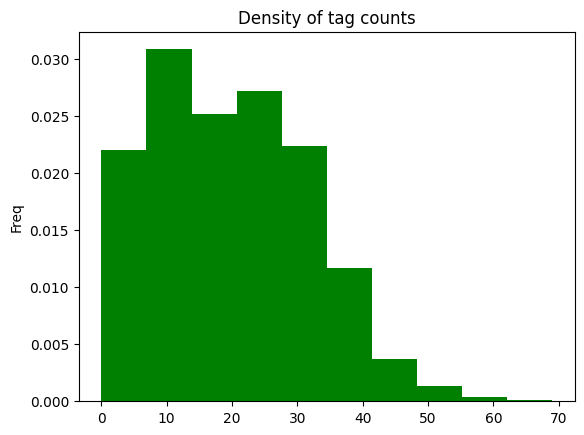

In [13]:
fig, ax=plt.subplots()
ax.hist(dfv['tag_conteo'],color='green',density=True)
ax.set_ylabel('Freq')
ax.set_title('Density of tag counts')
plt.show()

##  Parte 10

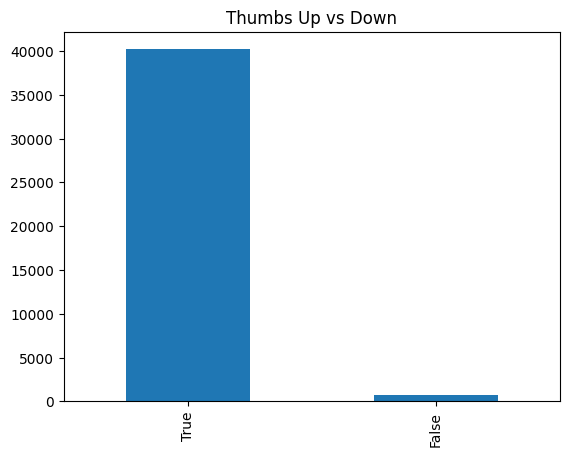

In [14]:
fig,ax=plt.subplots()
# ax.bar(dfv['likes'])
dfv['Likes'].value_counts().plot.bar().set_title('Thumbs Up vs Down')
plt.show()

## Parte 11 

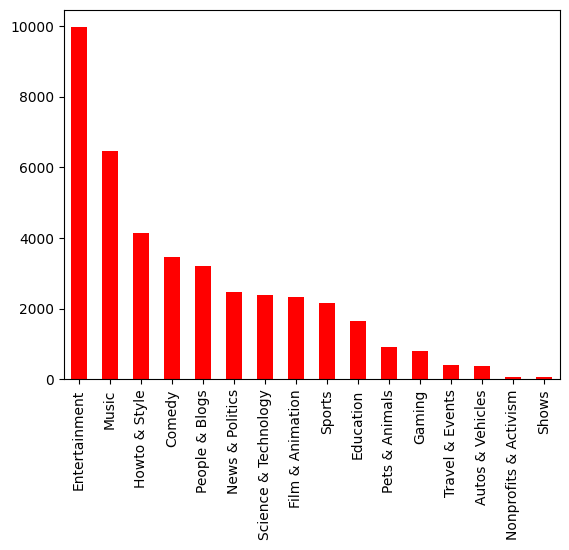

In [15]:
dfv['category_title'].value_counts(ascending=False).plot.bar(color='red')
plt.show()

## Parte 12 

Text(0, 0.5, 'Views')

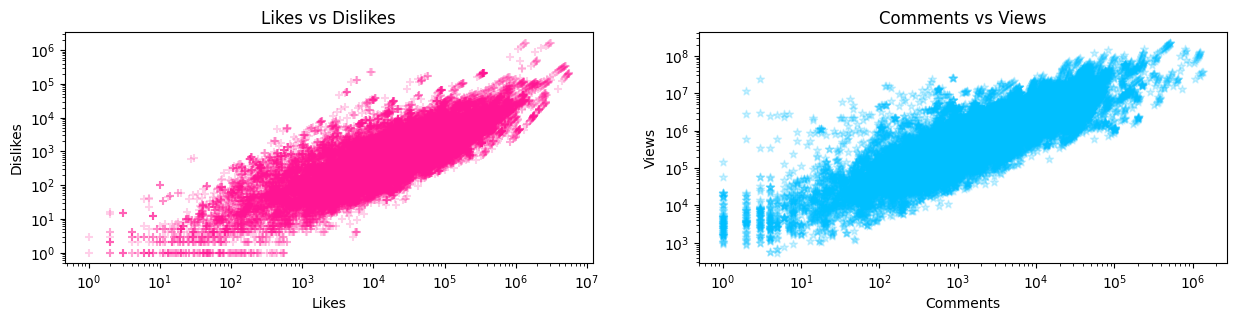

In [16]:
fig,axs=plt.subplots(1,2,figsize=(15,3))
lkVSdlk=dfv[['likes','dislikes']]
cmtVSvw=dfv[['views','comment_count']]

axs[0].scatter(lkVSdlk['likes'],lkVSdlk['dislikes'],color='deeppink',alpha=0.2,marker='+')
axs[0].set_xscale('log');axs[0].set_yscale('log');
axs[0].set_title('Likes vs Dislikes')
axs[0].set_xlabel('Likes')
axs[0].set_ylabel('Dislikes')
axs[1].scatter(cmtVSvw['comment_count'],cmtVSvw['views'],color='deepskyblue',alpha=0.2,marker='*')
axs[1].set_xscale('log');axs[1].set_yscale('log')
axs[1].set_title('Comments vs Views')
axs[1].set_xlabel('Comments')
axs[1].set_ylabel('Views')

In [18]:
dfv.to_csv('dfv.csv')

## Parte 13 

In [22]:
X=dfv['category_title'].unique().sort()
X